<a href="https://colab.research.google.com/github/StephenMa1511/DeepLearning/blob/main/DL_GWP_1_Collab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING GROUP WORK PROJECT 1

In [ ]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: 

In [ ]:
import collections
import random
import re
import torch
from d2l import torch as d2l

In [ ]:
class TimeMachine(d2l.DataModule):
    def _download(self):
        fname = d2l.download(d2l.DATA_URL + 'timemachine.txt', self.root,
        '090b5e7e70c295757f55df93cb0a180b9691891a')
        with open(fname) as f:
            return f.read()


In [ ]:
data = TimeMachine()
raw_text = data._download()
raw_text[:60]

KeyboardInterrupt: 

In [ ]:
@d2l.add_to_class(TimeMachine) #@save
def _preprocess(self, text):
    return re.sub('[^A-Za-z]+', ' ', text).lower()
text = data._preprocess(raw_text)
text[:60]


In [ ]:
@d2l.add_to_class(TimeMachine) #@save
def _tokenize(self, text):
    return list(text)
tokens = data._tokenize(text)
','.join(tokens[:30])

In [ ]:
class Vocab: #@save
    def __init__(self, tokens=[], min_freq=0, reserved_tokens=[]):
        # Flatten a 2D list if needed
        if tokens and isinstance(tokens[0], list):
            tokens = [token for line in tokens for token in line]
        # Count token frequencies
        counter = collections.Counter(tokens)
        self.token_freqs = sorted(counter.items(), key=lambda x: x[1],
        reverse=True)
        # The list of unique tokens
        self.idx_to_token = list(sorted(set(['<unk>'] + reserved_tokens + [
            token for token, freq in self.token_freqs if freq >= min_freq])))
        self.token_to_idx = {token: idx
        for idx, token in enumerate(self.idx_to_token)}
    def __len__(self):
        return len(self.idx_to_token)
    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]
    def to_tokens(self, indices):
        if hasattr(indices, '__len__') and len(indices) > 1:
           return [self.idx_to_token[int(index)] for index in indices]
        return self.idx_to_token[indices]
    @property
    def unk(self): # Index for the unknown token
        return self.token_to_idx['<unk>']


In [ ]:
tokens = [token for line in tokens for token in line]
tokens['a']

In [ ]:
token_freqs = sorted(counter.items(), key=lambda x: x[1],
reverse=True)
token_freqs

In [ ]:
min_freq=0
reserved_tokens=[]
idx_to_token = list(sorted(set(['<unk>'] + reserved_tokens + [
token for token, freq in token_freqs if freq >= min_freq])))
idx_to_token

In [ ]:
token_to_idx = {token: idx
for idx, token in enumerate(idx_to_token)}

token_to_idx


In [ ]:
mylist = ['c', 'b', 'e', 'u', 'm']
set(mylist)

In [ ]:
mylist = [1, 5, 18, 4, 7]
set(mylist)

In [ ]:
tokens[:5]

In [ ]:
vocab = Vocab(tokens)
vocab[tokens[:5]]

In [ ]:
vocab.__getitem__('a')

In [ ]:
@d2l.add_to_class(TimeMachine)
def build(self, raw_text, vocab=None):
    tokens = self._tokenize(self._preprocess(raw_text))
    if vocab is None: vocab = Vocab(tokens)
    corpus = [vocab[token] for token in tokens]
    return corpus, vocab
corpus, vocab = data.build(raw_text)
len(corpus), len(vocab)


In [ ]:
corpus[:10]

In [ ]:
raw_text_prprcess = TimeMachine()._preprocess(raw_text)
tokens = TimeMachine()._tokenize(raw_text_prprcess)

In [ ]:
tokens[:10]

In [ ]:
type(text.split())

list

|  |  |
|:---|:---|
|**Student name** |  |
| *Ma Quang Son*  |       |
|*Heathcliff Tatenda Nyambiya* | |
|*Joseph Olusegun Osuntoki* ||


## STEP 1

In this GWP, we pick Tesla stock (TSLA) as our study objective. We'll use 8 year history of daily price of TSLA to do analysis and build Deep Learning models to forecast future return of the stock

In [ ]:
tken = [21]
a = 0
if tken:
  a+=1
a


1

In [ ]:
from collections import Counter

# empty Counter
counter = Counter()
print(counter)  # Counter()

# Counter with initial values
counter = Counter(['a', 'a', 'b'])
print(counter)  # Counter({'a': 2, 'b': 1})

Counter()
Counter({'a': 2, 'b': 1})


In [ ]:
sorted?

## Library Imports

In [ ]:
import yfinance as yf
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm


from sklearn import metrics
from scipy.signal import periodogram
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
!pip install arch
import arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install pyts
from pyts.image import GramianAngularField

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.0 MB/s eta 0:00:00


In [ ]:
end = datetime.date.today()
start = datetime.date(2016,6,1)
df = yf.download("TSLA", start, end)
df['Log Adj Close'] = np.log(df['Adj Close'])
df = df.drop(columns = ['Open','High', 'Low','Close'])

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head()

,Adj Close,Volume,Log Adj Close
Date,,,
2016-06-01,14.637333,44740500,2.683575
2016-06-02,14.597333,30492000,2.680839
2016-06-03,14.599333,33435000,2.680976
2016-06-06,14.712000,33742500,2.688663
2016-06-07,15.489333,93204000,2.740152


## **Time Series Plot of TSLA (ORIGINAL DATA)**

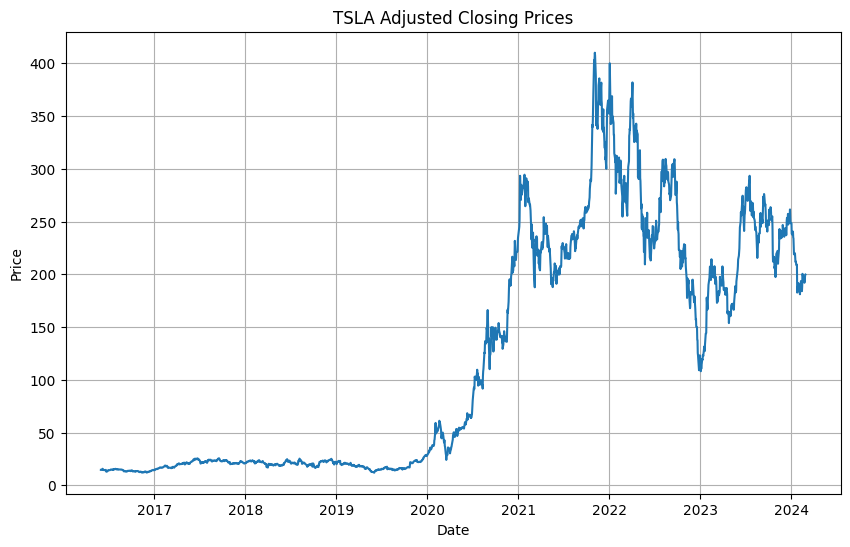

In [ ]:
# Apply log transformation to the original price series
tsla = df['Adj Close']

# Plot the log-transformed series
plt.figure(figsize=(10, 6))
plt.plot(tsla)
plt.title('TSLA Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#### DISTRIBUTION ANALYSIS

In [ ]:
tsla.describe()

count    1948.000000
mean      120.946321
std       113.069632
min        11.931333
25%        20.185167
50%        51.521999
75%       226.794994
max       409.970001
Name: Adj Close, dtype: float64

In [ ]:
# Calculate skewness and kurtosis
def distribution_plots(data):
  skewness = data.skew()
  kurtosis = data.kurtosis()

  # Set up the grid layout
  fig, axes = plt.subplots(2, 2, figsize=(14, 10))

  # Plot histogram and kernel density plot for the first difference
  sns.histplot(data, kde=True, ax=axes[0, 0])
  axes[0, 0].set_title(f'Histogram and KDE (Skewness: {skewness:.2f}, Kurtosis: {kurtosis:.2f})')

  # Plot histogram with different bin sizes
  sns.histplot(data, bins=30, ax=axes[0, 1])
  axes[0, 1].set_title('Histogram with 30 Bins')

  # Plot kernel density plot
  sns.kdeplot(data, ax=axes[1, 0])
  axes[1, 0].set_title('Kernel Density Plot')

  # Plot QQ plot
  stats.probplot(data, dist="norm", plot=axes[1, 1])
  axes[1, 1].set_title('QQ Plot')

  plt.tight_layout()
  plt.show()

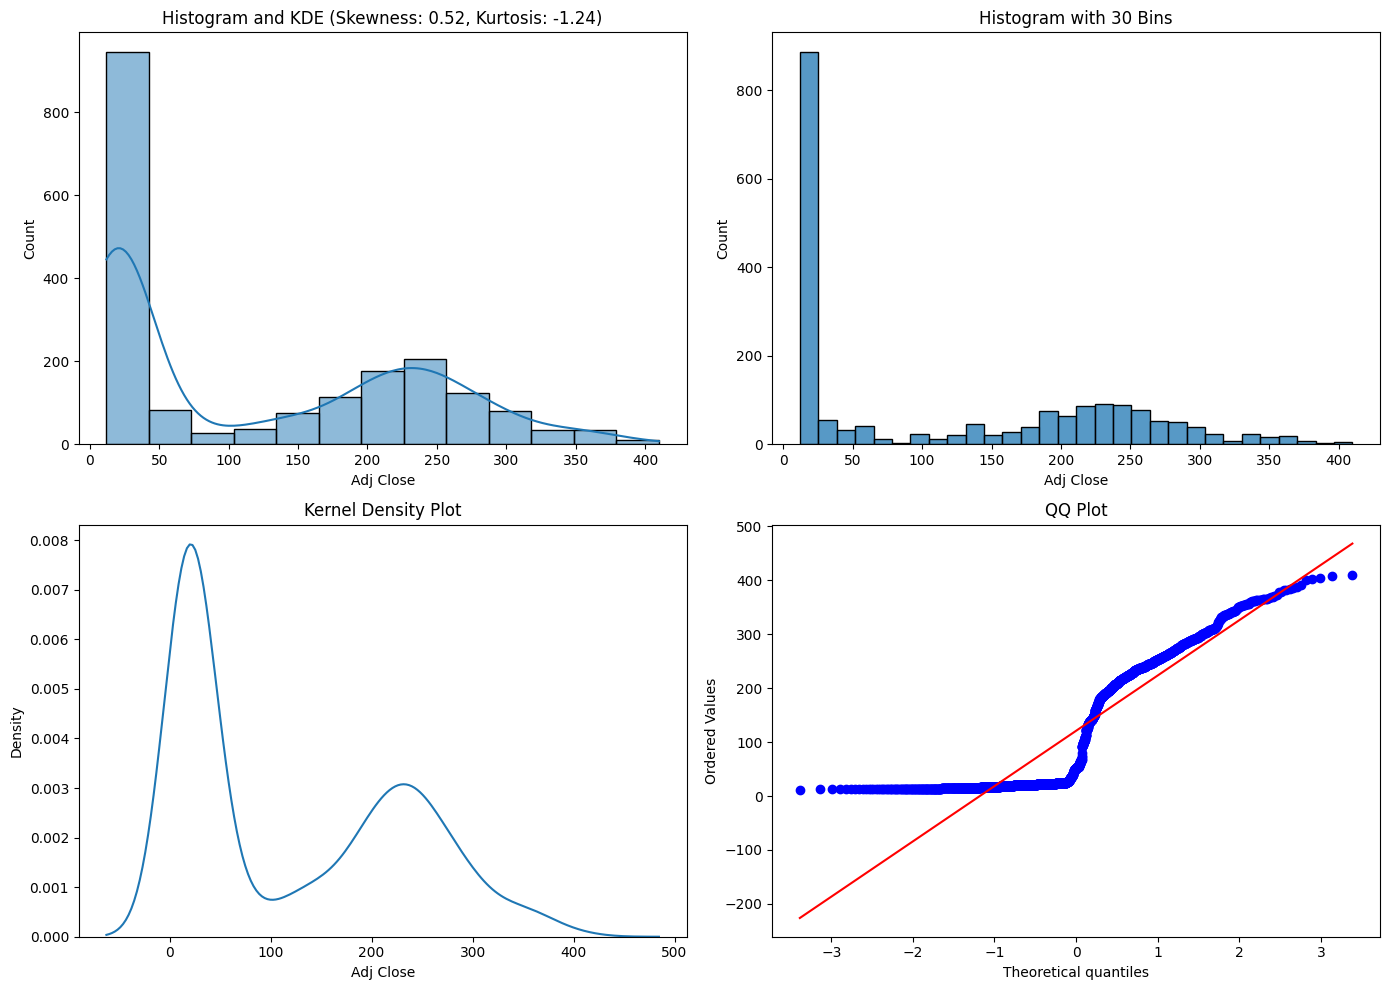

In [ ]:
distribution_plots(tsla)

The data (TESLA stock price) is positively skewed and kurtosis is less than what is expected in a normal distribution (3). Hence, the data should be transformed to closely resemble a normally distributed variable.

#### STATIONARITY TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf(series):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

The ADF test is conducted with the following assumptions:

Null Hypothesis (HO): Series is non-stationary, or series has a unit root.

Alternate Hypothesis(HA): Series is stationary, or series has no unit root.

We reject the null hypothesis(HO) if Test statistic < Critical Value and p-value < 0.05, i.e., time series does not have a unit root, meaning it is stationary. It does not have a time-dependent structure.

In [ ]:
adf(tsla)

Results of Dickey-Fuller Test:
Test Statistic                   -1.435216
p-value                           0.565282
#Lags Used                       24.000000
Number of Observations Used    1923.000000
Critical Value (1%)              -3.433755
Critical Value (5%)              -2.863044
Critical Value (10%)             -2.567571
dtype: float64


In this case, we cannot reject the null hypothesis. The p-value is greater than zero (far more than the 5% mark) and the test statistic is also more than any of the critical values.

Therefore, we cannot reject the null hypothesis and conclude that the series has a unit root. Hence, the time series is not stationary.

#### AUTOCORRELATION TEST

In [ ]:
sm.tsa.acf(tsla.dropna(), nlags = 5)

array([1.        , 0.99813769, 0.99636347, 0.99457983, 0.99280197,
       0.99084707])

In [ ]:
def autocorr_test(data):

  print(sm.tsa.acf(data.dropna(), nlags = 5))

  # Plot ACF and PACF side by side
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

  # ACF plot
  plot_acf(data, ax=ax1, lags=50)
  ax1.set_title('Autocorrelation Function (ACF)')
  ax1.set_xlabel('Lag')
  ax1.set_ylabel('ACF')

  # PACF plot
  plot_pacf(data, ax=ax2, lags=50)
  ax2.set_title('Partial Autocorrelation Function (PACF)')
  ax2.set_xlabel('Lag')
  ax2.set_ylabel('PACF')

  plt.tight_layout()
  plt.show()


[1.         0.99813769 0.99636347 0.99457983 0.99280197 0.99084707]


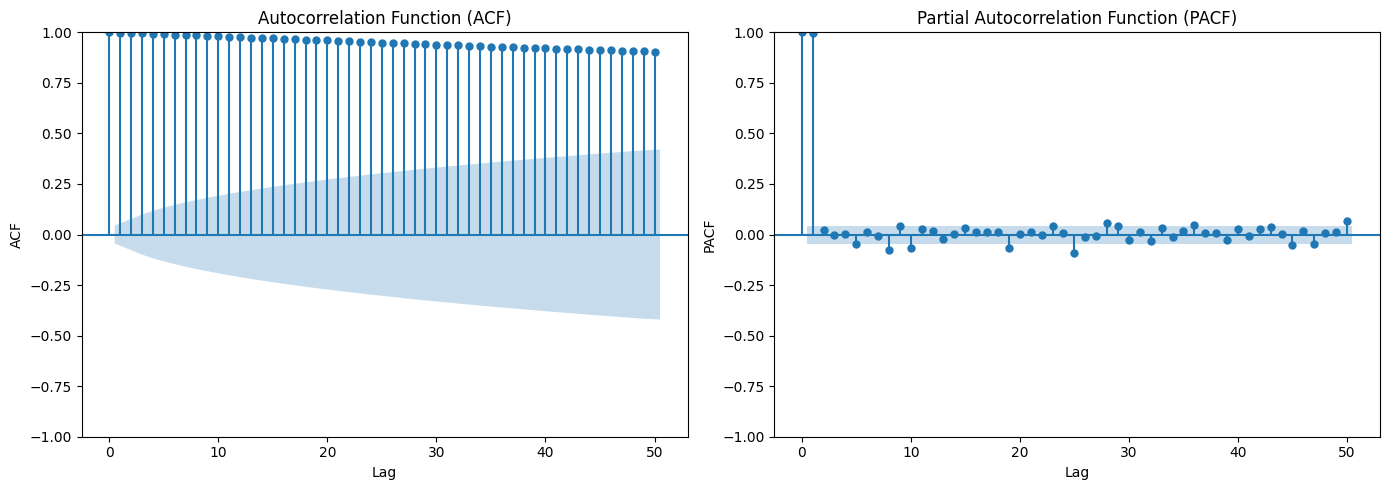

In [ ]:
autocorr_test(tsla)

The ACF plot also shows a slow decreasing trend, which indicates a trend in the time series. It also has a very high correlation with other lagged variables (almost 100% for the first five).

#### SEASONALITY

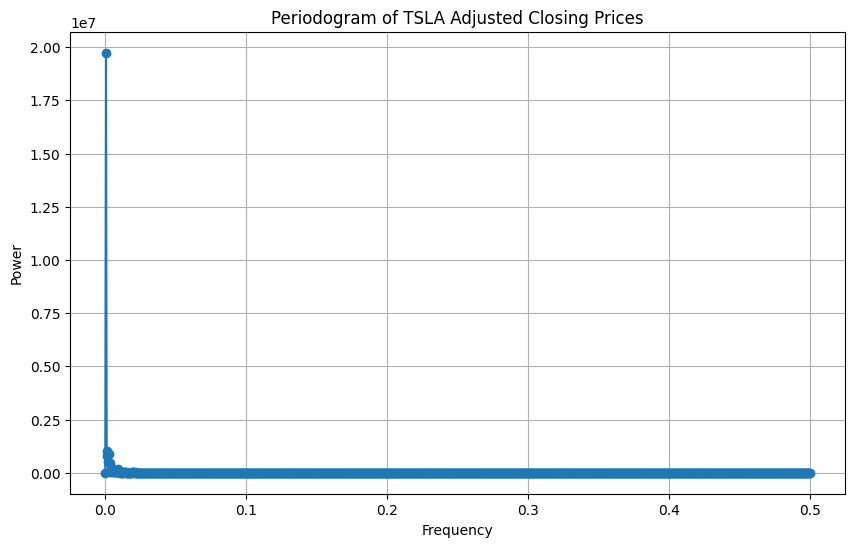

In [ ]:
# Compute the periodogram
frequencies, spectrum = periodogram(tsla, detrend='constant')

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.plot(frequencies, spectrum, marker='o', linestyle='-')
plt.title('Periodogram of TSLA Adjusted Closing Prices')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid(True)
plt.show()

## **FIRST DIFFERENCING (ON THE LOG TRANSFORM)**

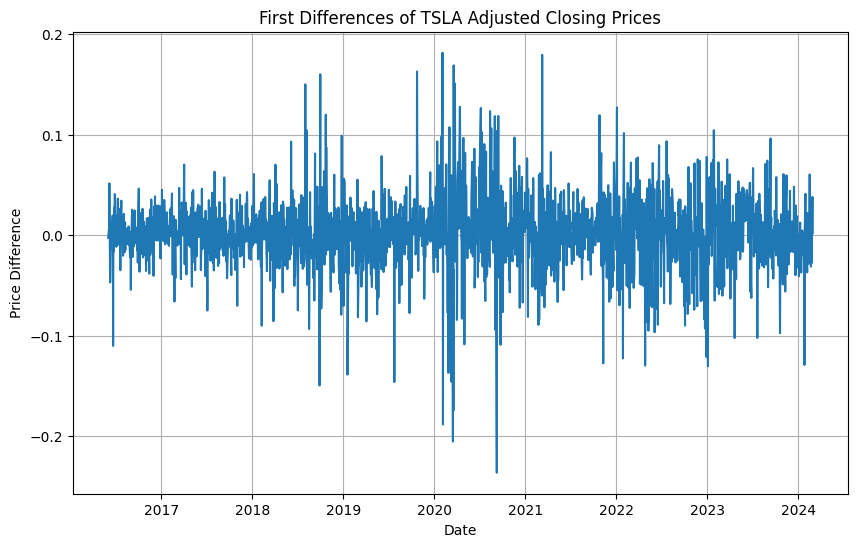

In [ ]:
# Take the first differences of the log of the original price series
tsla_diff = df['Log Adj Close'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(tsla_diff)
plt.title('First Differences of TSLA Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.show()


#### DISTRIBUTION ANALYSIS

In [ ]:
tsla_diff.describe()

count    1947.000000
mean        0.001342
std         0.036910
min        -0.236518
25%        -0.016397
50%         0.001346
75%         0.019188
max         0.181445
Name: Log Adj Close, dtype: float64

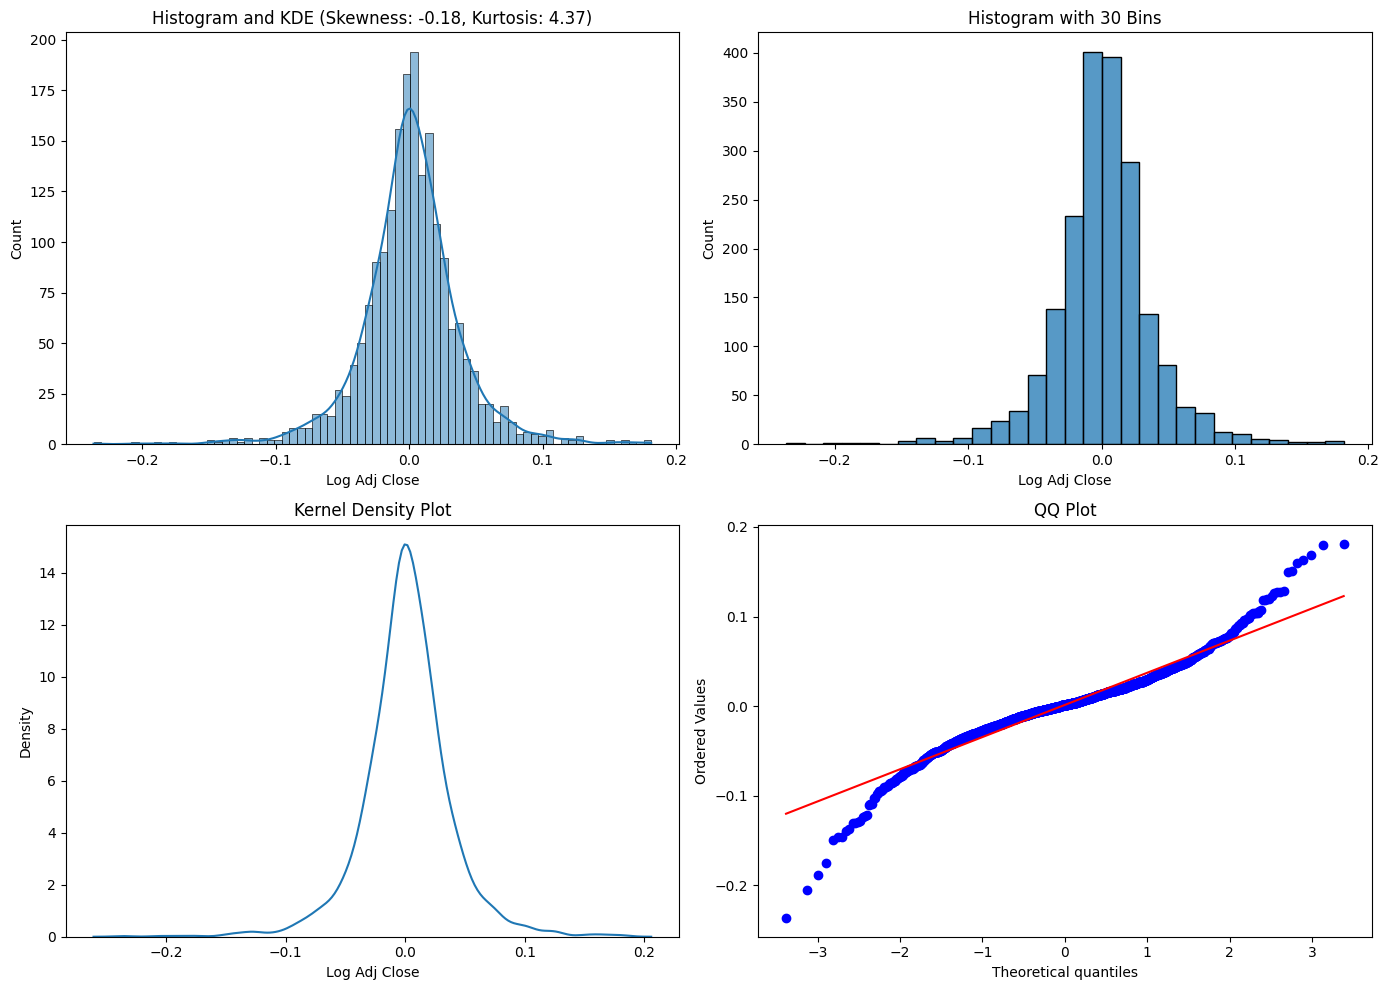

In [ ]:
# Calculate skewness and kurtosis
distribution_plots(tsla_diff)

The distribution after first-order differencing is close to normal. But Kurtosis seems to be more than what is required in a normal distribution. However, since the focus of this project is to build an ML model, we will focus less on the distribution and test for stationarity and autocorrelation, which can significantly affect the power of our predictive model.

ML models have proven to work well with non-normally distributed datasets.

#### STATIONARITY TEST

In [ ]:
# Perform Augmented Dickey-Fuller test
adf(tsla_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -30.383275
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1945.000000
Critical Value (1%)              -3.433717
Critical Value (5%)              -2.863027
Critical Value (10%)             -2.567562
dtype: float64


The ADF statistic is approximately -30.38 which is significantly lower than the critical values. The p-value is also approximately zero, far less than the aacceptable 5% mark.

This shows we can accept the null hypothesis that the time series is stationary and we can now use it for our forecasts. But it is also possible that we might have over-differentiated the series. As we can see the ADF p-value went from 0.56 to almost zero, which leaves the possibility that we can apply some level of differencing between 0 and 1, and yet still ensure the series is as stationary as we need it to be. In the end, differencing extracts mathematical memory from a time series data, and it is advisable to have some memory in order to produce good forecasts. Next, we'll use an approach called fractional differencing

#### AUTOCORRELATION TEST

[ 1.         -0.01468185  0.03261202  0.02028603  0.02053568 -0.03188515]


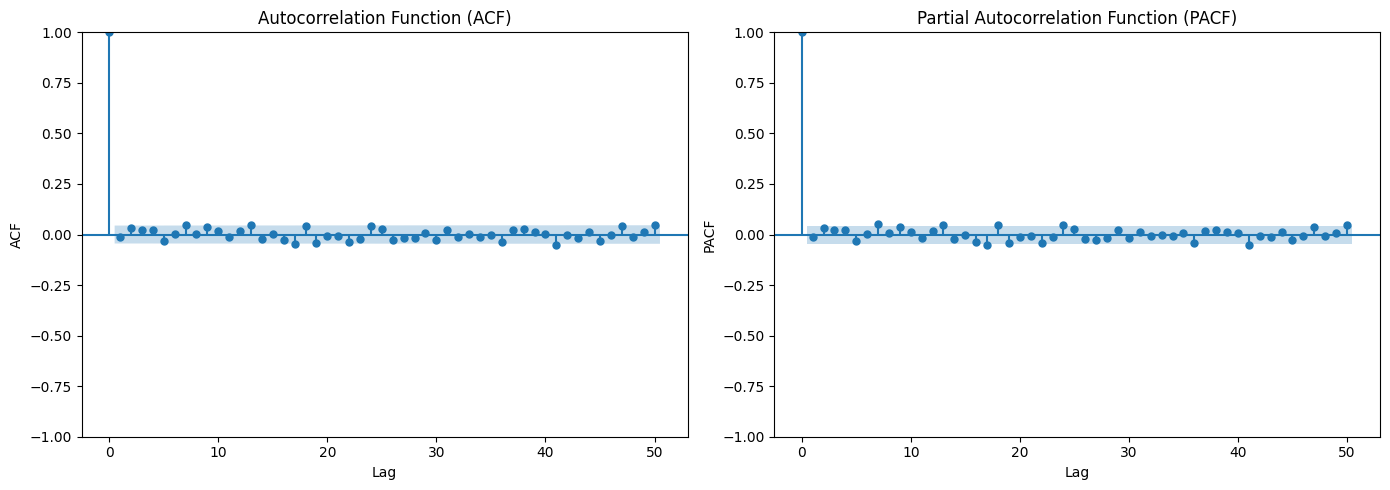

In [ ]:
autocorr_test(tsla_diff)

We see that even though our time series (first difference) is stationary, the variance is not really constant across the series. We can try other transformations such as second differencing, fractional differencing, or log of first/second differencing.

Our tests show that the first order difference is weak stationary and not strict stationarity since the criteria for strict stationarity is not satisfied.

Here we can see that our time series exhibits constant mean and constant autocorrelation but not constant variance. This is because we can still see that the variance does increase in certain times of the period under examination. Alternatively, using a GARCH model to may be the solution to deal with the non-constant variance issue. However, for the purposes of determining stationarity, GARCH will not be useful in our case here since the GARCH model does not guarantee strict stationarity.

#### VOLATILITY ANALYSIS

In [ ]:
# Specify GARCH(1,1) model
garch_model = arch.arch_model(tsla_diff, vol='Garch', p=1, q=1, rescale=False)

# Fit the model
garch_result = garch_model.fit(disp='off')

# Print model summary
print(garch_result.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Log Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3803.98
Distribution:                  Normal   AIC:                          -7599.96
Method:            Maximum Likelihood   BIC:                          -7577.66
                                        No. Observations:                 1947
Date:                Wed, Feb 28 2024   Df Residuals:                     1946
Time:                        18:23:00   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.0958e-03  7.315e-04      1.498      0.134 

For the GARCH model, the alpha parameter represents the impact of past squared innovations (volatility shocks) on current volatility, while the beta parameter represents the impact of past squared volatility on current volatility. If these parameters are statistically significant, it indicates that past volatility shocks and past volatility levels have a significant influence on current volatility.

#### SEASONALITY ANALYSIS

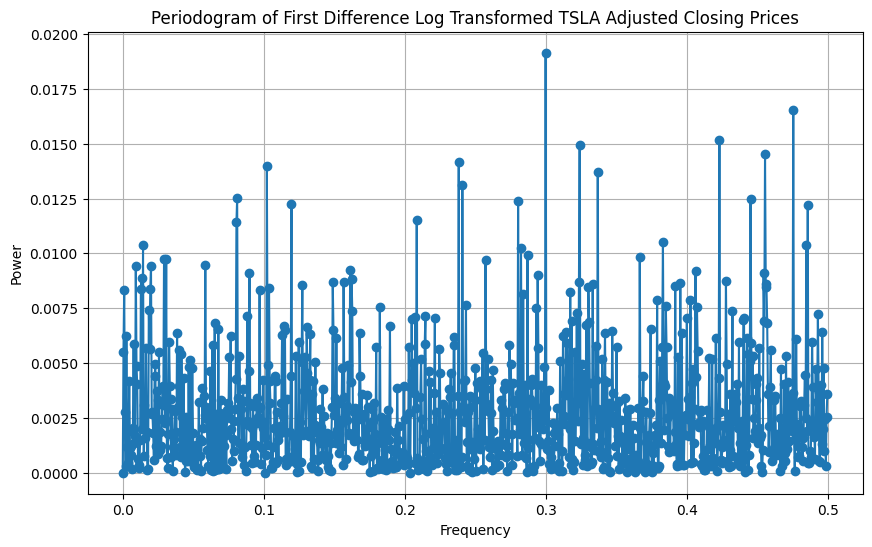

In [ ]:
# Compute the periodogram
frequencies, spectrum = periodogram(tsla_diff, detrend='constant')

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.plot(frequencies, spectrum, marker='o', linestyle='-')
plt.title('Periodogram of First Difference Log Transformed TSLA Adjusted Closing Prices')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid(True)
plt.show()


Given this observation, we may conclude that seasonality may not be a prominent feature in the data, at least within the frequency range analyzed.

Since the periodogram does not show any significant peaks above a certain threshold, such as 0.0175, it suggests that there are no dominant frequencies or periodic components in the data within the range of frequencies being examined.

This could indicate that the data is primarily driven by other factors, such as irregular fluctuations or random noise, rather than systematic seasonal variations.

## **FRACTIONAL DIFFERENCING**

Fractional differencing is a method in time series analysis where instead of subtracting consecutive values to make a series stationary, a fraction of the difference is subtracted. It's useful for handling data with long memory or persistence, often seen in financial time series. This technique provides more flexibility compared to traditional integer differencing.

In [ ]:
def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1)
    return w

def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()

def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients

    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:]

def cutoff_find(order,cutoff,start_lags):
  #order is our dearest d, cutoff is 1e-5 for us, and start lags
  # is an initial amount of lags in which the loop will start,
  # this can be set to high values in order to speed up the algo.
    val=np.inf
    lags=start_lags
    while abs(val)>cutoff:
        w=getWeights(order, lags)
        val=w[len(w)-1]
        lags+=1
    return lags

def ts_differencing_tau(series, order, tau):
    # return the time series resulting from (fractional) differencing
    lag_cutoff=(cutoff_find(order,tau,1)) #finding lag cutoff with tau
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:]

In [ ]:
possible_d=np.divide(range(1,20),20)
tau=1e-4
original_adf_stat_holder=[None]*len(possible_d)
log_adf_stat_holder=[None]*len(possible_d)

for i in range(len(possible_d)):
    original_adf_stat_holder[i]=adfuller(ts_differencing_tau(df['Adj Close'],possible_d[i],tau))[1]
    log_adf_stat_holder[i]=adfuller(ts_differencing_tau(df['Log Adj Close'],possible_d[i],tau))[1]

Text(0.5, 1.0, 'ADF P-value by differencing order in the logarithmic series')

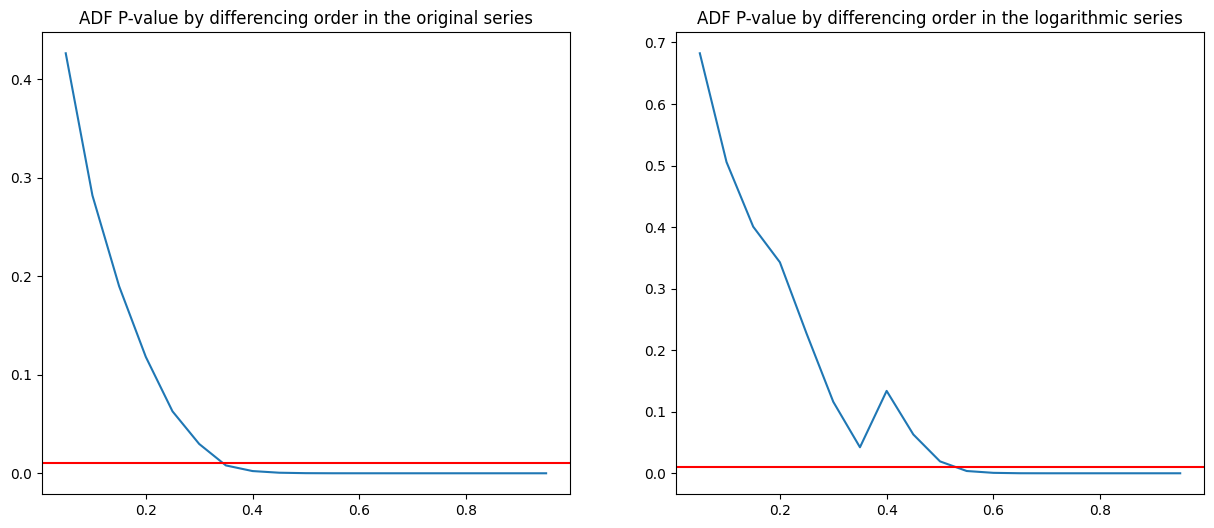

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,6))
axs[0].plot(possible_d,original_adf_stat_holder)
axs[0].axhline(y=0.01,color='r')
axs[0].set_title('ADF P-value by differencing order in the original series')
axs[1].plot(possible_d,log_adf_stat_holder)
axs[1].axhline(y=0.01,color='r')
axs[1].set_title('ADF P-value by differencing order in the logarithmic series')

As we can observe from the graph above, the ADF P-value threshold of 0.01 is exceeded by the differencing order of around 0.4 in the original "ADJ Close" series and by diffrencing order of around 0.5 in the logarithmic series. Thus we can conclude that taking a full difference is not required to achieve stationary given our TSLA time series case

Bearing that in mind, we will create a time series of lag 0.5 and examine it to see if the stationary statistic hold for the newly generated time series

#### DISTRIBUTION ANALYSIS

In [ ]:
tsla_fracdiff = ts_differencing_tau(df['Log Adj Close'],0.5,tau)
tsla_fracdiff.describe()

count    1746.000000
mean        0.183812
std         0.073752
min        -0.148312
25%         0.127295
50%         0.183955
75%         0.235175
max         0.462163
Name: Log Adj Close, dtype: float64

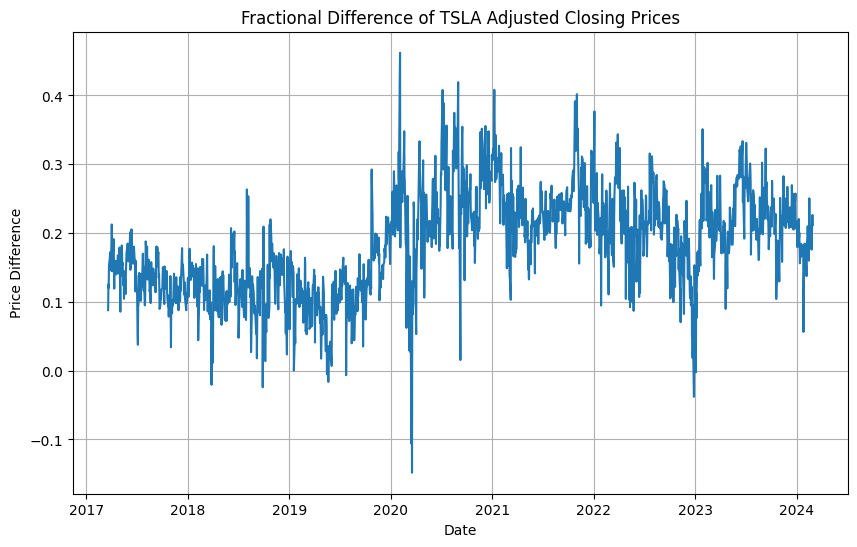

In [ ]:
# Plot the fractionally differenced series
plt.figure(figsize=(10, 6))
plt.plot(tsla_fracdiff)
plt.title('Fractional Difference of TSLA Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.grid(True)
plt.show()

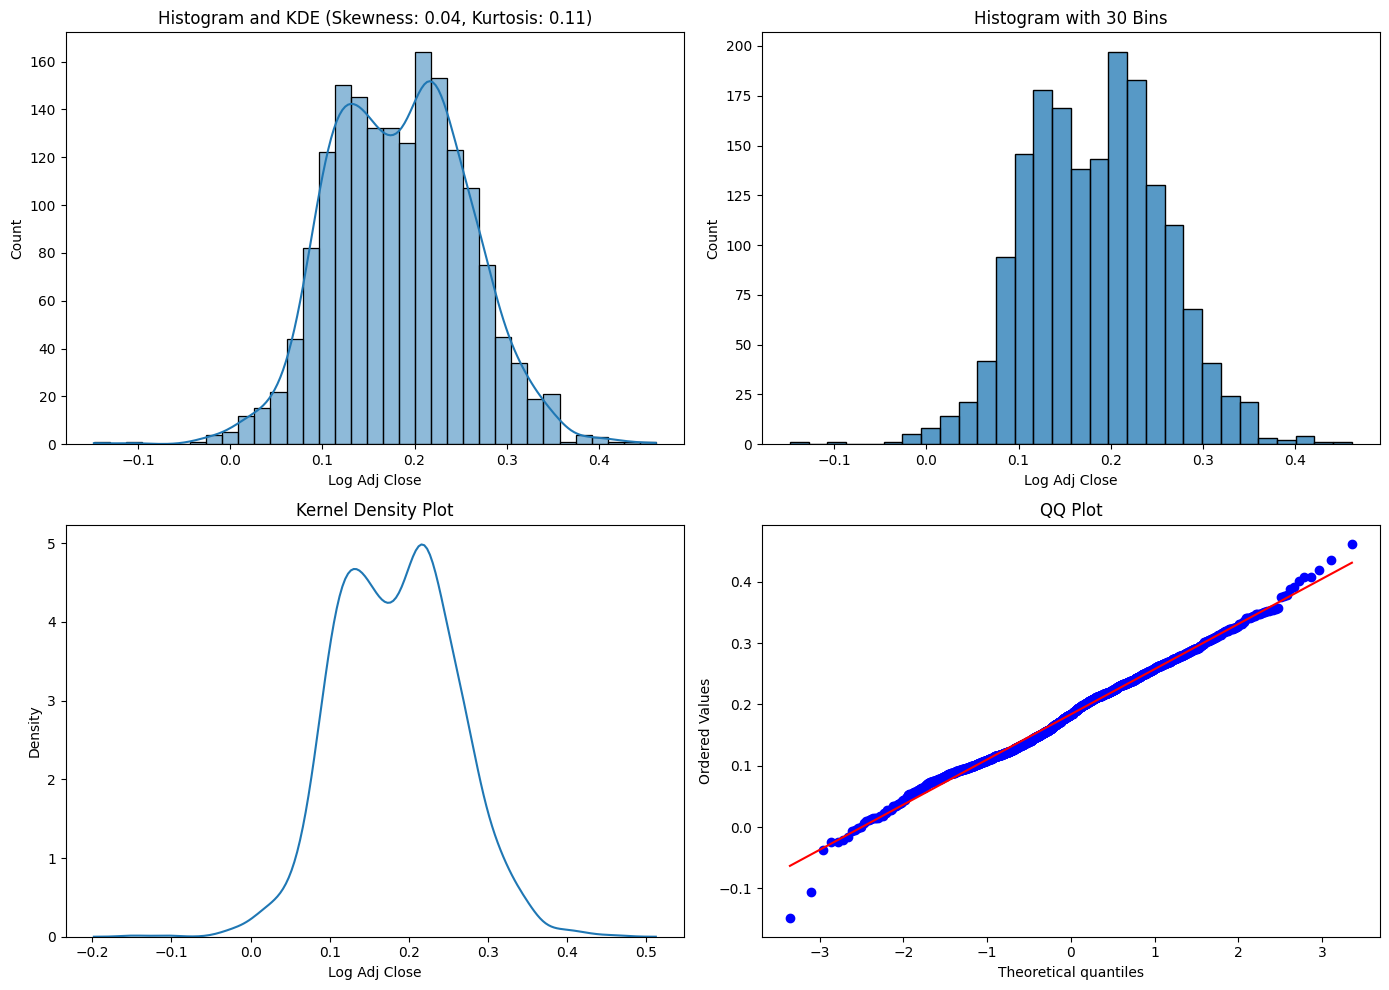

In [ ]:
distribution_plots(tsla_fracdiff)

From the graph above we can observe that the distribution of our fractional differencing time series of TSLA is not skewed at all, but it doesn't seems to be not normally distributed due to the kurtosis. Lets use Shapiro-Wilk test to take a closer look

In [ ]:
from scipy.stats import shapiro
print(shapiro(tsla_fracdiff))

ShapiroResult(statistic=0.9950692057609558, pvalue=1.611519473954104e-05)


p-value of the Shapiro-Wilk test is less than 5%, thus we discard the null hypothesis that our fractional differencing is normally distributed

#### STATIONARITY TEST

In [ ]:
# Perform Augmented Dickey-Fuller test
adf(tsla_fracdiff)

Results of Dickey-Fuller Test:
Test Statistic                   -3.211845
p-value                           0.019309
#Lags Used                       23.000000
Number of Observations Used    1722.000000
Critical Value (1%)              -3.434153
Critical Value (5%)              -2.863220
Critical Value (10%)             -2.567664
dtype: float64


We see that the p-value is small and the test statistic is lower than our critical values, only higher at 1% critical value. Thus, we can accept the null hypothesis that the series is stationary.

#### AUTOCORRELATION TEST

[1.         0.82666392 0.77893194 0.74407606 0.71659285 0.6876391 ]


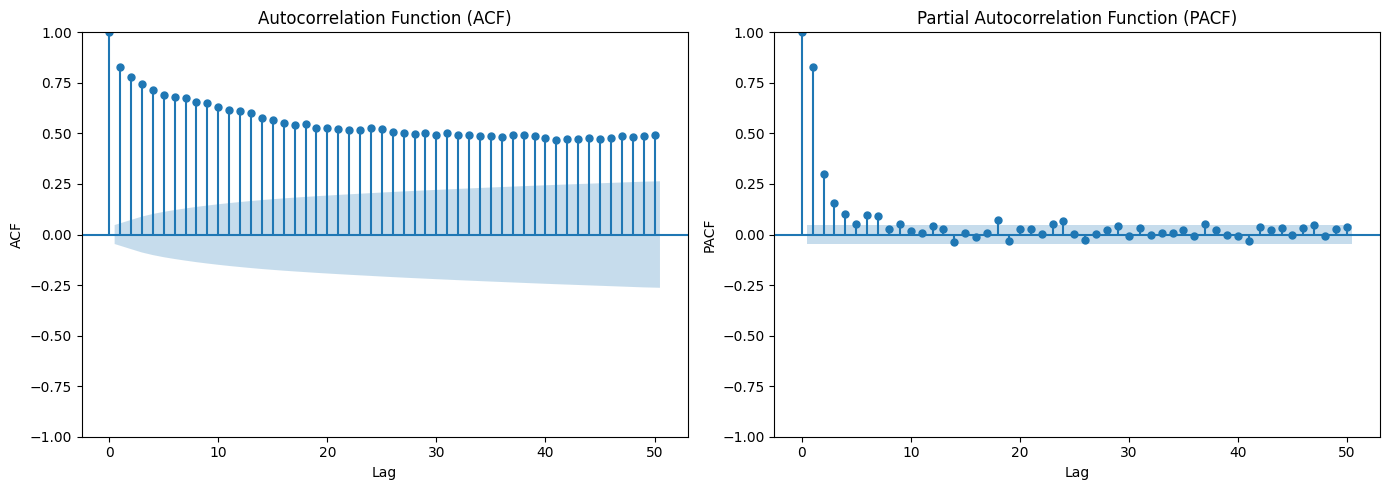

In [ ]:
autocorr_test(tsla_fracdiff)

Autocorrelation seem to be a bit higher than we see with the first difference time series. We will see the significance/effect after we fit our ML model and test it.

#### VOLATILITY ANALYSIS

In [ ]:
# Specify GARCH(1,1) model
garch_model = arch.arch_model(tsla_fracdiff, vol='Garch', p=1, q=1, rescale=False)

# Fit the model
garch_result = garch_model.fit(disp='off')

# Print model summary
print(garch_result.summary())


                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Log Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2315.22
Distribution:                  Normal   AIC:                          -4622.43
Method:            Maximum Likelihood   BIC:                          -4600.57
                                        No. Observations:                 1746
Date:                Wed, Feb 28 2024   Df Residuals:                     1745
Time:                        18:23:22   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.1938  8.152e-03     23.770 6.855e-125 [  0.178,  0.21

With garch model result, we can see that the alpha and beta coefficients are statistically significant and the numbers are moderately noticable. We could conculde that recent past volatilies and shocks has considerable impact to current volatilty of the time series

#### SEASONALITY ANALYSIS

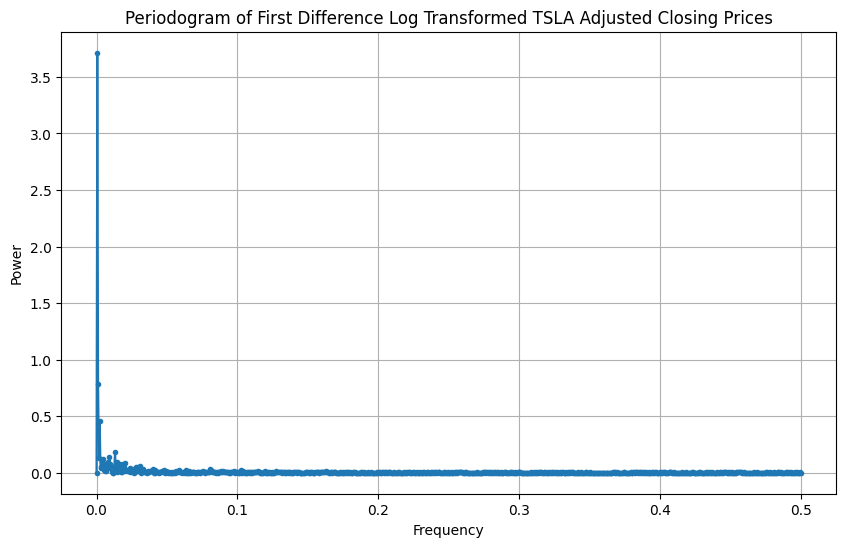

In [ ]:
# Compute the periodogram
frequencies, spectrum = periodogram(tsla_fracdiff, detrend='constant')

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.plot(frequencies, spectrum, marker='.', linestyle='-')
plt.title('Periodogram of First Difference Log Transformed TSLA Adjusted Closing Prices')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid(True)
plt.show()


In [ ]:
display(spectrum[:20])

array([7.34474232e-32, 3.71415406e+00, 7.80790034e-01, 1.27781702e-01,
       4.54063483e-01, 4.32263605e-02, 4.80838772e-02, 9.09335955e-02,
       1.22412895e-01, 2.16951156e-02, 5.93540557e-02, 1.33398072e-02,
       1.34669635e-02, 8.58775730e-02, 9.41589442e-02, 3.98839697e-02,
       1.43234317e-01, 7.53510783e-02, 6.30837834e-02, 8.76558752e-03])

We can observe that the peak of the periodgram is the first value, corresponding to a frequency of almost 0, the period for this value is 1/0 which is close to infinity. It suggest that our fractional differencing time series might not have a seasonal cycle at all, yet our time series has 1947 datapoints. Therefore, we can discard the seasonality feature of this time series in this circumstance since its cycle is too long for our analysis.

## STEP 2

### (A) Training a Classification Problem Multi-Layer Perceptron Model (MLP) on the original TSLA Time Series.

In [ ]:
# We will create lag features as inputs and use the next observation as the target variable

# Define the number of lag observations to consider
def ml_model(df, data):
  num_lags = 20;  # You can adjust this number as needed

  # Discretize the target variable into classes or categories
  num_classes = 2  # You can adjust the number of classes as needed
  df['Returns'] = df[data].pct_change();
  df.reset_index(inplace=True);

  df.drop(["Date","Volume","Log Adj Close","Adj Close",data], axis=1,inplace = True);

  df["Ret_Out"] = df["Returns"].shift(-120);
  df["Output"] = df["Ret_Out"] > 0;
  df["Output"] = df["Output"].astype(int);
  del df["Ret_Out"];

  df.dropna(inplace = True);

  ts = int(0.2 * len(df));  # Number of observations in the test sample
  split = len(df) - ts;  # From this data we are in the test sample
  test_time = df.iloc[split:, 0:1].values;  # Keep the test sample dates
  Ret_vector = df.iloc[split:, 1:2].values;

  from sklearn.model_selection import train_test_split
  Xdf, ydf = df.iloc[:, 2:-1], df.iloc[:, -1];
  X = Xdf.astype("float32");
  y = ydf.astype("float32");

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, shuffle=False);  # It is important to keep "shuffle=False"
  print(X_train.shape, X_test.shape, y_train.shape, y_test.shape);

  tf.keras.backend.clear_session();  # We clear the backend to reset the random seed process
  tf.random.set_seed(1234); # We will set a random seed so that results obtained are somewhat replicable

  act_fun = "relu";
  hp_units = 25;
  hp_units_2 = 15;
  hp_units_3 = 10;
  n_dropout = 0.2;

  model = tf.keras.models.Sequential();
  model.add(tf.keras.layers.Dense(units=hp_units, activation=act_fun));
  model.add(tf.keras.layers.Dropout(n_dropout));
  model.add(tf.keras.layers.Dense(units=hp_units_2, activation=act_fun));
  model.add(tf.keras.layers.Dropout(n_dropout));
  model.add(tf.keras.layers.Dense(units=hp_units_3, activation=act_fun));
  model.add(tf.keras.layers.Dropout(n_dropout));
  model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"));

  hp_lr = 1e-5  # Learning rate
  adam = tf.keras.optimizers.Adam(learning_rate=hp_lr);  # Adam optimizer
  model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["accuracy"]);

  es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",mode="max",verbose=1,
    patience=20,restore_best_weights=True);

  class_weight = {0: (np.mean(y_train) / 0.5) * 1.2, 1: 1.0};
  print(class_weight);

  history = model.fit(X_train,y_train,validation_split=0.2,epochs=500,batch_size=32,verbose=2,
                      callbacks=[es],class_weight=class_weight);

  model.summary();

  ## To test model performance
  y_prob = model.predict(X_test);
  y_pred = np.where(y_prob > 0.50, 1, 0);

  acc = model.evaluate(X_test, y_test);
  print("Model accuracy in test: ", acc);

  cm = metrics.confusion_matrix(y_test, y_pred);
  plt.figure(figsize=(9, 9));
  ax = plt.subplot();
  sns.heatmap(cm, annot=True, fmt="g", ax=ax);
  # annot=True to annotate cells, ftm='g' to disable scientific notation
  # labels, title and ticks
  ax.set_xlabel("Predicted labels");
  ax.set_ylabel("True labels");
  ax.set_title("Confusion Matrix");
  ax.xaxis.set_ticklabels(["DOWN", "UP"]);
  ax.yaxis.set_ticklabels(["DOWN", "UP"]);

(1558, 0) (389, 0) (1558,) (389,)
{0: 1.255455780029297, 1: 1.0}
Epoch 1/500
39/39 - 3s - loss: 0.7764 - accuracy: 0.5056 - val_loss: 0.6931 - val_accuracy: 0.5032 - 3s/epoch - 76ms/step
Epoch 2/500
39/39 - 0s - loss: 0.7764 - accuracy: 0.4703 - val_loss: 0.6931 - val_accuracy: 0.5032 - 410ms/epoch - 11ms/step
Epoch 3/500
39/39 - 0s - loss: 0.7764 - accuracy: 0.4703 - val_loss: 0.6931 - val_accuracy: 0.5032 - 311ms/epoch - 8ms/step
Epoch 4/500
39/39 - 0s - loss: 0.7764 - accuracy: 0.4703 - val_loss: 0.6931 - val_accuracy: 0.5032 - 303ms/epoch - 8ms/step
Epoch 5/500
39/39 - 0s - loss: 0.7764 - accuracy: 0.4703 - val_loss: 0.6931 - val_accuracy: 0.5032 - 250ms/epoch - 6ms/step
Epoch 6/500
39/39 - 0s - loss: 0.7764 - accuracy: 0.4703 - val_loss: 0.6931 - val_accuracy: 0.5032 - 229ms/epoch - 6ms/step
Epoch 7/500
39/39 - 0s - loss: 0.7764 - accuracy: 0.4703 - val_loss: 0.6931 - val_accuracy: 0.5032 - 289ms/epoch - 7ms/step
Epoch 8/500
39/39 - 0s - loss: 0.7764 - accuracy: 0.4703 - val_loss:

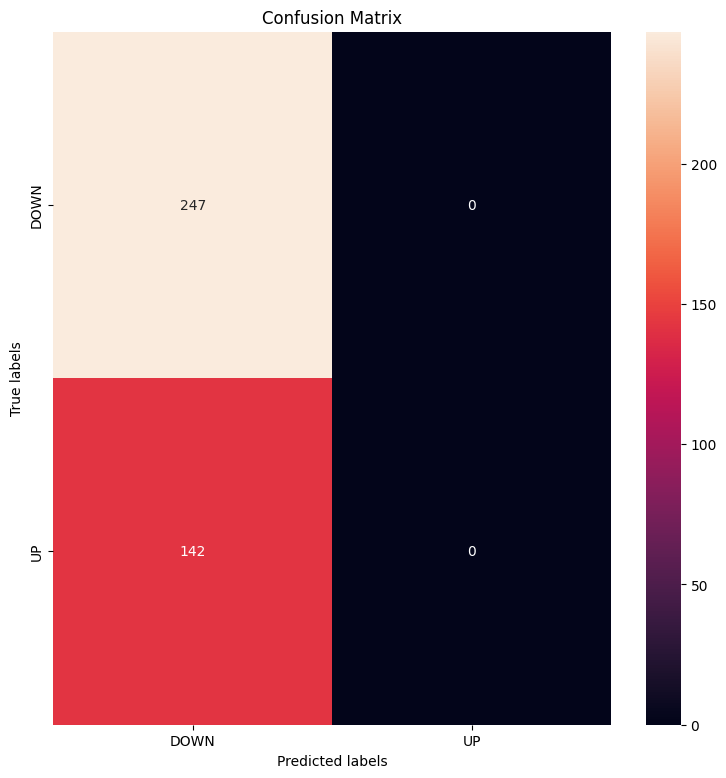

In [ ]:
df_copy = df.copy()
df_copy["Original"] = tsla;
ml_model(df_copy,"Original")

### (B) Training A Classification Problem Multi-Layer Perceptron Model (MLP) on the log of the first differenced series.

(1557, 0) (389, 0) (1557,) (389,)
{0: 0.594990348815918, 1: 1.0}
Epoch 1/500
39/39 - 4s - loss: 0.4805 - accuracy: 0.7574 - val_loss: 0.6931 - val_accuracy: 0.7308 - 4s/epoch - 91ms/step
Epoch 2/500
39/39 - 0s - loss: 0.4805 - accuracy: 0.7574 - val_loss: 0.6930 - val_accuracy: 0.7308 - 273ms/epoch - 7ms/step
Epoch 3/500
39/39 - 0s - loss: 0.4804 - accuracy: 0.7574 - val_loss: 0.6929 - val_accuracy: 0.7308 - 353ms/epoch - 9ms/step
Epoch 4/500
39/39 - 0s - loss: 0.4804 - accuracy: 0.7574 - val_loss: 0.6928 - val_accuracy: 0.7308 - 401ms/epoch - 10ms/step
Epoch 5/500
39/39 - 0s - loss: 0.4804 - accuracy: 0.7574 - val_loss: 0.6928 - val_accuracy: 0.7308 - 324ms/epoch - 8ms/step
Epoch 6/500
39/39 - 0s - loss: 0.4803 - accuracy: 0.7574 - val_loss: 0.6927 - val_accuracy: 0.7308 - 350ms/epoch - 9ms/step
Epoch 7/500
39/39 - 0s - loss: 0.4803 - accuracy: 0.7574 - val_loss: 0.6926 - val_accuracy: 0.7308 - 294ms/epoch - 8ms/step
Epoch 8/500
39/39 - 1s - loss: 0.4803 - accuracy: 0.7574 - val_loss:

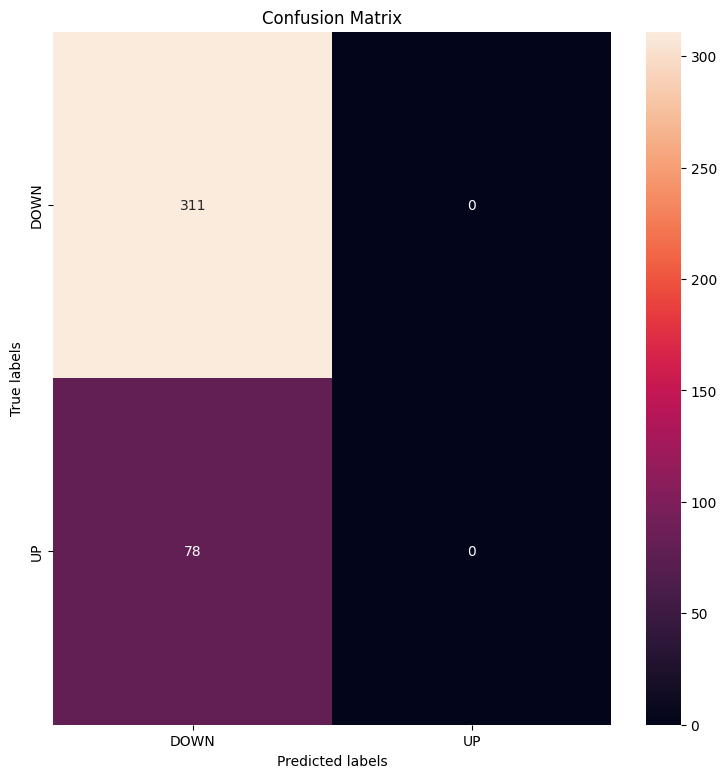

In [ ]:
df_copy = df.copy()
df_copy["First_Diff"] = tsla_diff;
ml_model(df_copy,"First_Diff")

### (C) Training A Classification Problem Multi-Layer Perceptron Model (MLP) on the fractionally differenced series.

(1396, 0) (349, 0) (1396,) (349,)
{0: 1.1363896608352662, 1: 1.0}
Epoch 1/500
35/35 - 2s - loss: 0.7430 - accuracy: 0.5278 - val_loss: 0.6931 - val_accuracy: 0.5214 - 2s/epoch - 67ms/step
Epoch 2/500
35/35 - 0s - loss: 0.7430 - accuracy: 0.5278 - val_loss: 0.6931 - val_accuracy: 0.5214 - 110ms/epoch - 3ms/step
Epoch 3/500
35/35 - 0s - loss: 0.7430 - accuracy: 0.5278 - val_loss: 0.6931 - val_accuracy: 0.5214 - 109ms/epoch - 3ms/step
Epoch 4/500
35/35 - 0s - loss: 0.7430 - accuracy: 0.5278 - val_loss: 0.6931 - val_accuracy: 0.5214 - 103ms/epoch - 3ms/step
Epoch 5/500
35/35 - 0s - loss: 0.7430 - accuracy: 0.5278 - val_loss: 0.6931 - val_accuracy: 0.5214 - 98ms/epoch - 3ms/step
Epoch 6/500
35/35 - 0s - loss: 0.7430 - accuracy: 0.5278 - val_loss: 0.6931 - val_accuracy: 0.5214 - 106ms/epoch - 3ms/step
Epoch 7/500
35/35 - 0s - loss: 0.7430 - accuracy: 0.5278 - val_loss: 0.6931 - val_accuracy: 0.5214 - 102ms/epoch - 3ms/step
Epoch 8/500
35/35 - 0s - loss: 0.7430 - accuracy: 0.5278 - val_loss: 

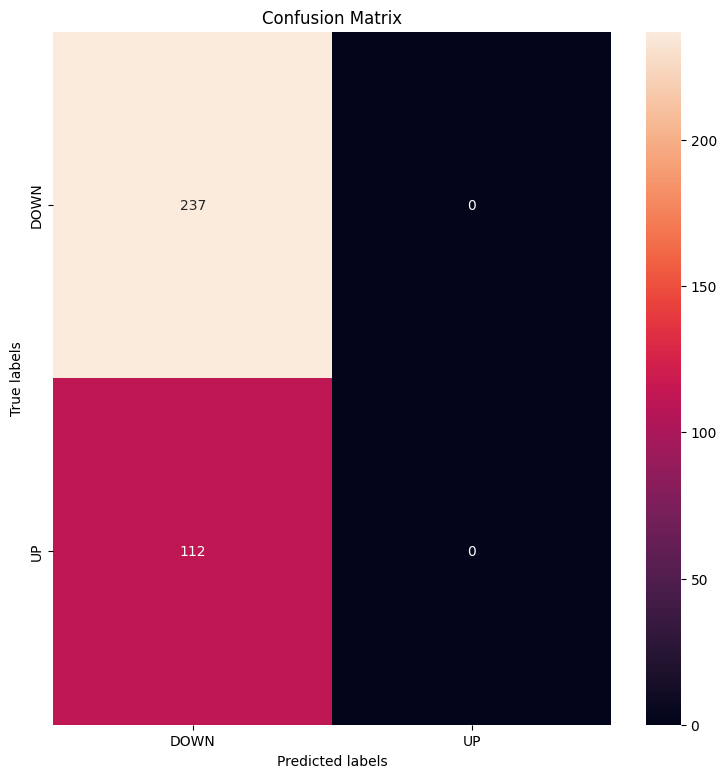

In [ ]:
df_copy = df.copy()
df_copy["Frac_Diff"] = tsla_fracdiff;
ml_model(df_copy,"Frac_Diff")

Looking at the accuracy results from the three series, it seems the first difference of the log transform of the series produces the best result. It had an accuracy of almost 80% compared to fractionally differenced variable with about 68% and the original time series which had about 64%. This is probably because it exhibited the lowest autocorrelation out of the three. It also has a constant variance across the series. A plot of the fractional difference series shows that volatility is not constant as it keeps jumping up and down throughout the series.

## STEP 3

### (A) GAF For Original TSLA Time Series

In [ ]:
def GAF_plot(data):
  order_values = np.linspace(0.0, 1.0, num=6)  # Range from 0.0 to 1.0 with 6 values
  # Assuming you have fetched the TSLA stock data and stored it in 'df'
  # Compute fractionally differenced time series and perform GAF transformation for each order value
  fig, axes = plt.subplots(2, 6, figsize=(24, 10))
  for i, order in enumerate(order_values):
    # Prepare data for GAF transformation
    X_train = []
    window_size = 30
    for j in range(window_size, data.shape[0]):
        X_train.append(data[j - window_size : j])
    X_train = np.array(X_train)

    # Perform GAF Transformation
    transformer = GramianAngularField()
    X_train_gaf = transformer.transform(X_train)

    # Plot original fractionally differenced time series
    axes[0, i].plot(X_train[0, :])
    axes[0, i].set_title(f'Original Time Series (Order={order})')

    # Plot GAF representation
    axes[1, i].imshow(X_train_gaf[0], cmap="rainbow", origin='lower')
    axes[1, i].set_title(f'GAF Representation (Order={order})')

  plt.tight_layout()
  plt.show()

In [ ]:
tsla

NameError: name 'tsla' is not defined

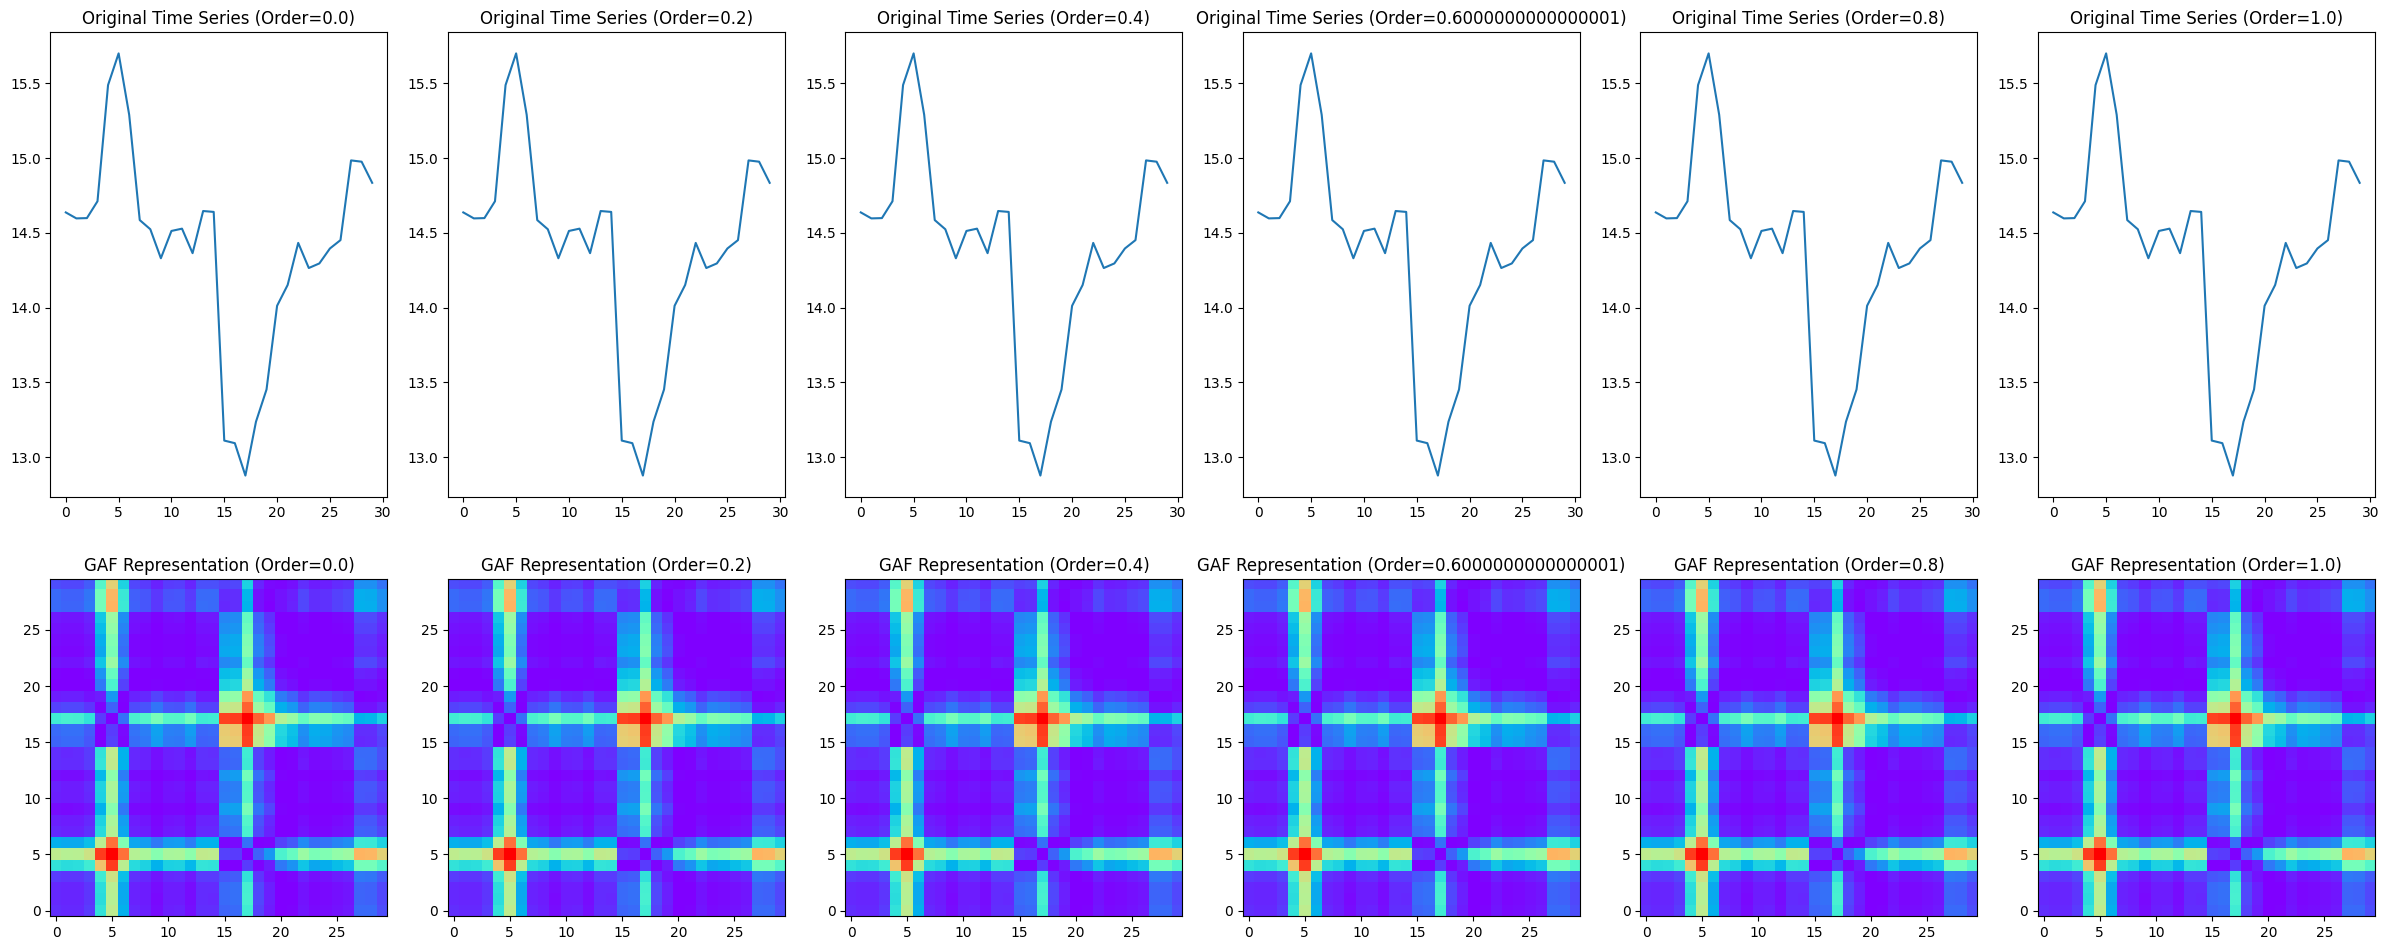

In [ ]:
GAF_plot(tsla)

In [ ]:
def GAF_model(data):
  # Define a range of potential values for the order parameter
  order_values = np.linspace(0.0, 1.0, num=6)  # Range from 0.0 to 1.0 with 6 values

  # Compute fractionally differenced time series and perform GAF transformation for each order value
  X_gaf = []
  y = []  # Assuming you have labels for the time series
  for i, order in enumerate(order_values):
    # Compute fractionally differenced time series
    series = data

    # Prepare data for GAF transformation
    X_train = []
    window_size = 30
    for j in range(window_size, series.shape[0]):
        X_train.append(series[j - window_size : j])
    X_train = np.array(X_train)

    # Perform GAF Transformation
    transformer = GramianAngularField()
    X_train_gaf = transformer.transform(X_train)

    # Append GAF representations to the list
    X_gaf.append(X_train_gaf)
    y.extend([i] * X_train_gaf.shape[0])  # Assuming i is the label for each GAF representation

  X_gaf = np.concatenate(X_gaf)
  y = np.array(y)

  # One-hot encode the labels
  y_onehot = to_categorical(y)

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_gaf, y_onehot, test_size=0.2, random_state=42)

  # Reshape the data to fit the input requirements of the CNN
  input_shape = X_train[0].shape

  # Add channel dimension
  input_shape = (*input_shape, 1)
  X_train = X_train.reshape(X_train.shape[0], *input_shape)
  X_test = X_test.reshape(X_test.shape[0], *input_shape)

  # Define the CNN model
  model = Sequential([Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
                      MaxPooling2D(pool_size=(2, 2)),
                      Flatten(),Dense(128, activation='relu'),Dense(len(order_values), activation='softmax')])

  # Compile the model
  model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

  # Train the model
  model.fit(X_train, y_train, epochs=20, batch_size = 32, validation_data=(X_test, y_test))

  # Evaluate the model
  loss, accuracy = model.evaluate(X_test, y_test)
  print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

In [ ]:
GAF_model(df['Adj Close'])

Epoch 1/20
288/288 [==============================] - 9s 27ms/step - loss: 1.7990 - accuracy: 0.1573 - val_loss: 1.7920 - val_accuracy: 0.1507
Epoch 2/20
288/288 [==============================] - 7s 24ms/step - loss: 1.7920 - accuracy: 0.1687 - val_loss: 1.7920 - val_accuracy: 0.1555
Epoch 3/20
288/288 [==============================] - 8s 26ms/step - loss: 1.7919 - accuracy: 0.1693 - val_loss: 1.7922 - val_accuracy: 0.1551
Epoch 4/20
288/288 [==============================] - 8s 28ms/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7927 - val_accuracy: 0.1542
Epoch 5/20
288/288 [==============================] - 8s 28ms/step - loss: 1.7921 - accuracy: 0.1689 - val_loss: 1.7924 - val_accuracy: 0.1538
Epoch 6/20
288/288 [==============================] - 9s 31ms/step - loss: 1.7926 - accuracy: 0.1653 - val_loss: 1.7929 - val_accuracy: 0.1503
Epoch 7/20
288/288 [==============================] - 7s 23ms/step - loss: 1.7928 - accuracy: 0.1635 - val_loss: 1.7928 - val_accuracy: 0.1403

### (B) GAF For Transformed (First difference of log) TSLA Time Series

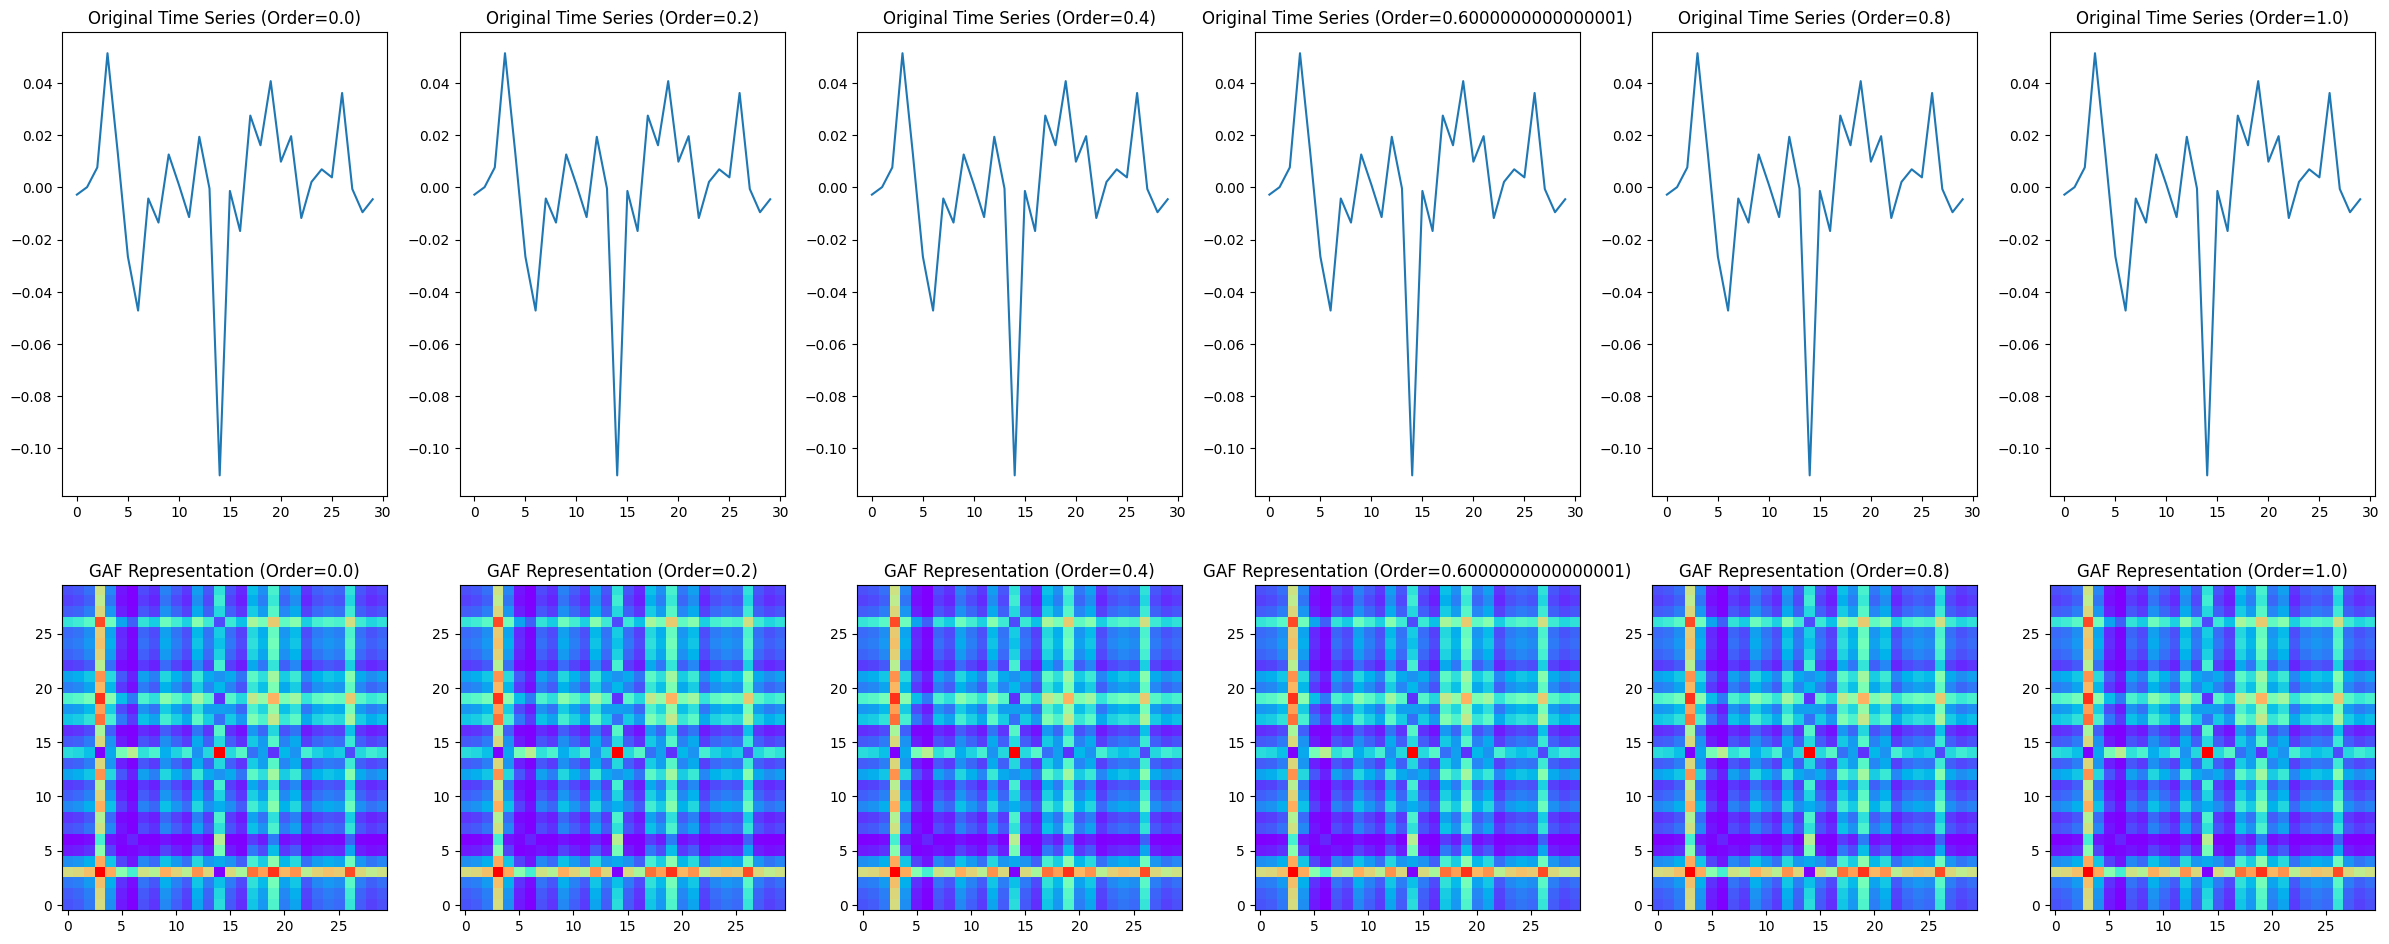

In [ ]:
GAF_plot(tsla_diff)

In [ ]:
GAF_model(tsla_diff)

Epoch 1/20
288/288 [==============================] - 8s 26ms/step - loss: 1.8011 - accuracy: 0.1582 - val_loss: 1.7919 - val_accuracy: 0.1578
Epoch 2/20
288/288 [==============================] - 8s 26ms/step - loss: 1.7919 - accuracy: 0.1667 - val_loss: 1.7921 - val_accuracy: 0.1569
Epoch 3/20
288/288 [==============================] - 8s 27ms/step - loss: 1.7919 - accuracy: 0.1641 - val_loss: 1.7921 - val_accuracy: 0.1612
Epoch 4/20
288/288 [==============================] - 7s 24ms/step - loss: 1.7919 - accuracy: 0.1685 - val_loss: 1.7921 - val_accuracy: 0.1573
Epoch 5/20
288/288 [==============================] - 8s 27ms/step - loss: 1.7919 - accuracy: 0.1657 - val_loss: 1.7920 - val_accuracy: 0.1612
Epoch 6/20
288/288 [==============================] - 7s 23ms/step - loss: 1.7919 - accuracy: 0.1631 - val_loss: 1.7921 - val_accuracy: 0.1612
Epoch 7/20
288/288 [==============================] - 7s 26ms/step - loss: 1.7919 - accuracy: 0.1628 - val_loss: 1.7921 - val_accuracy: 0.1582

### (C) GAF For Fractional Difference TSLA Time Series

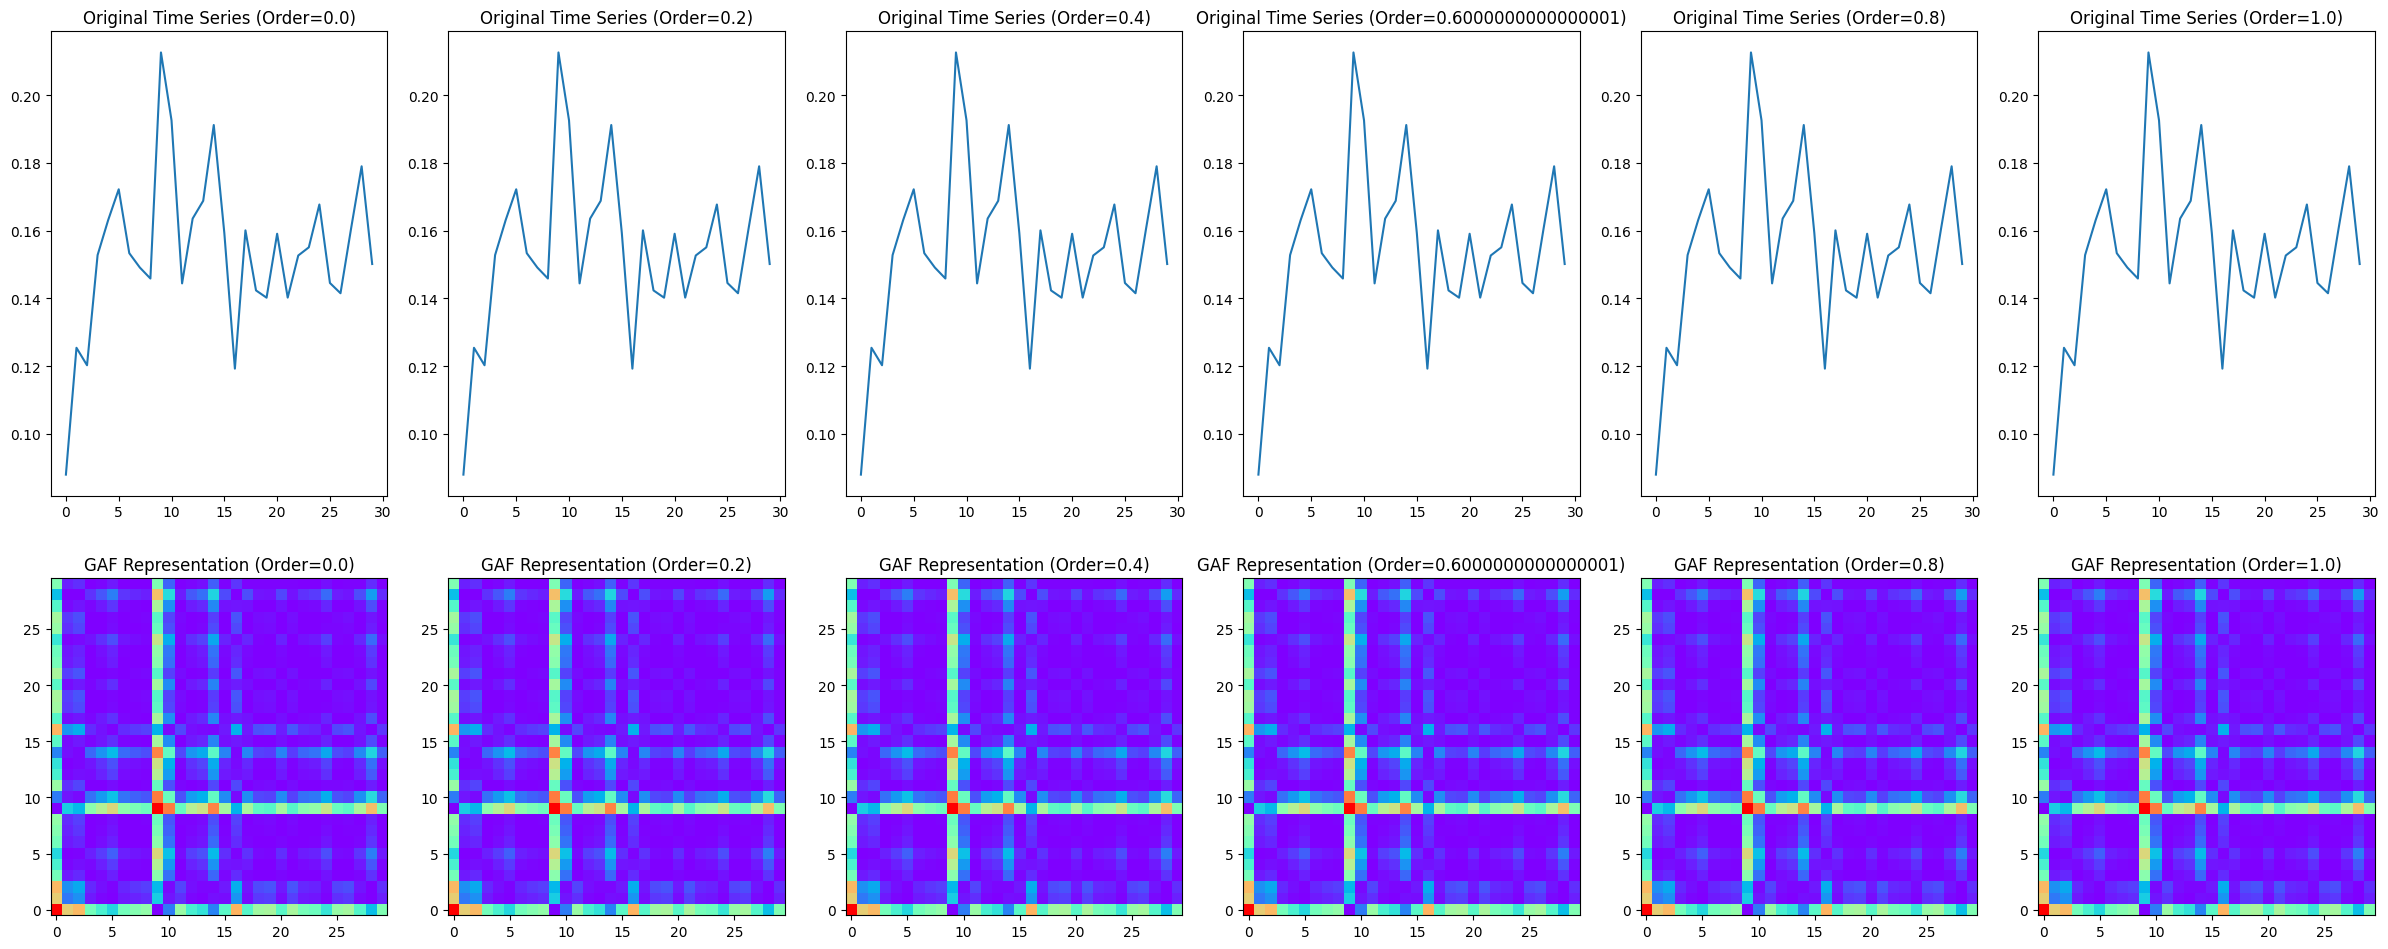

In [ ]:
GAF_plot(tsla_fracdiff)

In [ ]:
GAF_model(tsla_fracdiff)

Epoch 1/20
258/258 [==============================] - 7s 22ms/step - loss: 1.8026 - accuracy: 0.1597 - val_loss: 1.7918 - val_accuracy: 0.1680
Epoch 2/20
258/258 [==============================] - 6s 22ms/step - loss: 1.7919 - accuracy: 0.1605 - val_loss: 1.7921 - val_accuracy: 0.1510
Epoch 3/20
258/258 [==============================] - 6s 23ms/step - loss: 1.7919 - accuracy: 0.1654 - val_loss: 1.7922 - val_accuracy: 0.1505
Epoch 4/20
258/258 [==============================] - 6s 23ms/step - loss: 1.7919 - accuracy: 0.1707 - val_loss: 1.7925 - val_accuracy: 0.1510
Epoch 5/20
258/258 [==============================] - 6s 25ms/step - loss: 1.7919 - accuracy: 0.1694 - val_loss: 1.7928 - val_accuracy: 0.1490
Epoch 6/20
258/258 [==============================] - 6s 22ms/step - loss: 1.7919 - accuracy: 0.1705 - val_loss: 1.7924 - val_accuracy: 0.1515
Epoch 7/20
258/258 [==============================] - 7s 26ms/step - loss: 1.7919 - accuracy: 0.1673 - val_loss: 1.7926 - val_accuracy: 0.1515

As seen in the test accuracy of the three variables, they are all very low but the fractional differenced variable has the best result of over 14%

---
This notebook is the work and compilation of Joseph Olusegun Osuntoki, Ma Quang Son and Heathcliff Tatenda Nyambiya